# 06MBIG - Machine Learning  
## Álvaro González Rodríguez  
### 74746657S

En este notebook se pretende devolver una solución al problema de la competición del Dengue de DrivenData.
(https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/).  
El objetivo es predecir los casos totales de dengue en los días especificados en el dataset *dengue_features_test.csv*.  
La puntuación mínima que debemos obtener es de MAE = 29.2764

---
# **Actividad 1 - Exploración**

En esta actividad se exploran los datos que tenemos. Buscando correlaciones entre variables, eliminando variables repetidas y outliers.

Importamos las librerias necesarias

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
# from google.colab import files

# from sklearn.cluster import KMeans
# from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage


import warnings
warnings.filterwarnings('ignore')

### Lectura de los datos
Hemos subido a un repositorio de GitHub los datos para no tener que hacerlo de la manera usual desde Colab (era un poco engorroso).

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/alvgoro/06MBIG_MachineLearning/main/dengue_features_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/alvgoro/06MBIG_MachineLearning/main/dengue_features_test.csv')
labels_df = pd.read_csv('https://raw.githubusercontent.com/alvgoro/06MBIG_MachineLearning/main/dengue_labels_train.csv')

In [4]:
train_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [5]:
train_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [6]:
test_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [7]:
test_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


In [8]:
labels_df

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


## **Descripción de las columnas del dataset.**

`city` - Abreviación de la ciudad: *sj* para San Juan y *iq* para Iquitos.  
`year` - Año de la fecha `week_start_date`.  
`weekofyear` - Semana del año de la fecha `week_start_date`.  
`week_start_date` - Fecha dada en el formato yyyy-mm-dd.  
`station_max_temp_c` - Temperatura máxima.  
`station_min_temp_c` - Temperatura mínima.  
`station_avg_temp_c` - Temperatura media.  
`station_precip_mm` - Precipitaciones totales.  
`station_diur_temp_rng_c` - Rango de temperatura diurna.  
`precipitation_amt_mm` - Precipitaciones totales.  
`reanalysis_sat_precip_amt_mm` - Precipitaciones totales.  
`reanalysis_dew_point_temp_k` - Temperatura media del punto de rocío.  
`reanalysis_air_temp_k` - Temperatura media del aire.  
`reanalysis_relative_humidity_percent` - Humedad relativa media.  
`reanalysis_specific_humidity_g_per_kg` - Humedad específica media.  
`reanalysis_precip_amt_kg_per_m2` - Precipitaciones totales.  
`reanalysis_max_air_temp_k` - Temperatura máxima del aire.  
`reanalysis_min_air_temp_k` - Temperatura mínima del aire.  
`reanalysis_avg_temp_k` - Temperatura media del aire.  
`reanalysis_tdtr_k` - Rango de temperatura diurna.  
`ndvi_se` - Diferencia en el nivel de vegetación en la zona sureste de la ciudad.  
`ndvi_sw` - Diferencia en el nivel de vegetación en la zona suroeste de la ciudad.  
`ndvi_ne` - Diferencia en el nivel de vegetación en la zona noreste de la ciudad.  
`ndvi_nw` - Diferencia en el nivel de vegetación en la zona noroeste de la ciudad.  
`total_cases` - Casos totales de Dengue **(variable objetivo)**

---

Vemos que existen varias columnas que parecen expresar lo mismo:  
'Precipitaciones totales' y 'Temperaturas' (en Kelvin o Celsius).  
Tenemos redundancia en el dataset. Estas variables tendremos que analizarlas exhaustivamente.

Puesto que en nuestro dataset tenemos dos ciudades distintas *Iquitos = iq* y *San Juan = sj*, las cuales geográficamente están bien separadas, lo más lógico sería dividir en 2 el dataset. Habría que estudiar las ciudades como dos series temporales diferentes.

Fusionamos el dataset `train` con el de `labels` para tener la columna `total_cases` en el `train`.

In [9]:
train_df = train_df.merge(labels_df, on=['city', 'year', 'weekofyear'])

# Dias

Eliminamos la columna `week_start_date`, nos está aportando la misma información que `weekofyear` y `year`. Además nuestro objetivo presenta un paso por semana, así que no nos interesa conocer el día.

In [10]:
train_df.drop(['week_start_date'], axis=1, inplace=True)
test_df.drop(['week_start_date'], axis=1, inplace=True)

## Missing values
Comprobamos si nuestros datos presentan missing values.

In [11]:
# Missing values en porcentaje
print('Porcentaje de Missing values (Train)\n\n', round(train_df.isnull().sum()*100/train_df.shape[0], 2))
print('\n----------------------------------------------\n')
print('Porcentaje de Missing values (Test)\n\n', round(test_df.isnull().sum()*100/test_df.shape[0], 2))

Porcentaje de Missing values (Train)

 city                                      0.00
year                                      0.00
weekofyear                                0.00
ndvi_ne                                  13.32
ndvi_nw                                   3.57
ndvi_se                                   1.51
ndvi_sw                                   1.51
precipitation_amt_mm                      0.89
reanalysis_air_temp_k                     0.69
reanalysis_avg_temp_k                     0.69
reanalysis_dew_point_temp_k               0.69
reanalysis_max_air_temp_k                 0.69
reanalysis_min_air_temp_k                 0.69
reanalysis_precip_amt_kg_per_m2           0.69
reanalysis_relative_humidity_percent      0.69
reanalysis_sat_precip_amt_mm              0.89
reanalysis_specific_humidity_g_per_kg     0.69
reanalysis_tdtr_k                         0.69
station_avg_temp_c                        2.95
station_diur_temp_rng_c                   2.95
station_max_temp_c   

Ya que los datos tienen relación temporal, es más adecuado rellenar los missing values con una interpolación entre los valores de alrededor que con el dato más común o la mediana.  
Aplicamos una interpolación por splines de orden 5, para tratar de predecir los datos faltantes de la mejor manera.

In [12]:
for col in train_df.columns:
    train_df[col].interpolate(method='spline', order=5, inplace=True)
for col in test_df.columns:
    test_df[col].interpolate(method='spline', order=5, inplace=True)

## Matriz de correlación

Comprobamos la correlación entre las variables con el fin de ver si es posible eliminar alguna variable para evitar redundancia y construir un modelo más sencillo.

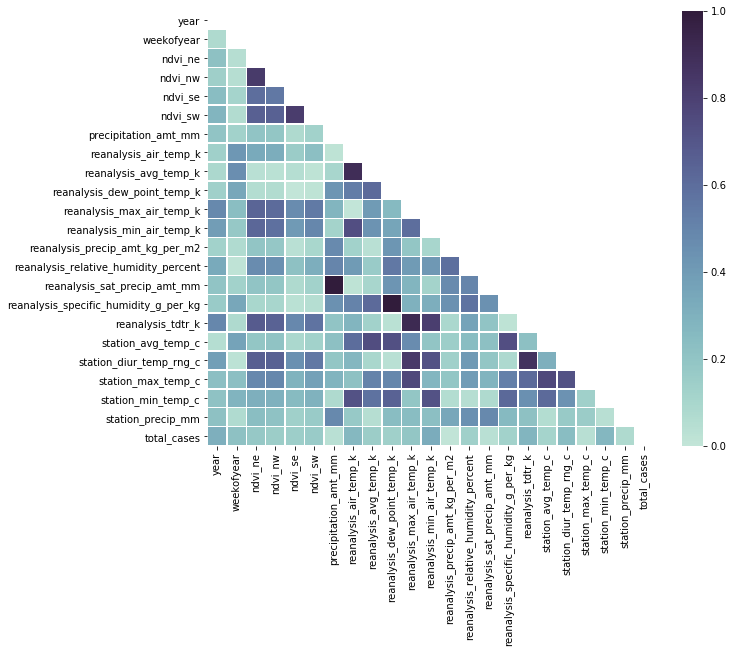

In [13]:
correlation = train_df.corr(method='pearson')

# Definimos máscara para enseñar la matriz triangular inferior
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

# Definimos paleta de colores
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

plt.figure(figsize=(10,8))
sns.heatmap(abs(correlation), 
            linewidths=.5,
            mask=mask,
            cmap=cmap,
            vmin=0,
            vmax=1,
            annot=False)

Efectivamente tenemos variables con altos índices de correlación. Como hemos dicho anteriormente, en nuestro dataset tenemos variables que describen lo mismo: temperatura de Kelvin o grados Celsius, o la precipitación medida en 4 variables distintas.  
Haremos un análisis más exhaustivo a continuación.

Lo bueno es que se observa que nuestra variable objetivo `total_cases` no tiene correlaciones altas con las demás variables.

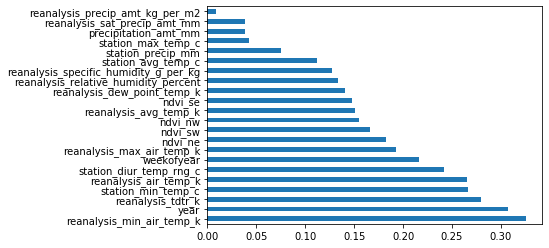

In [14]:
# Comprobamos qué variables dependientes están más correlacionadas con la variable objetivo
abs(correlation['total_cases']).sort_values(ascending=False)\
                               .drop('total_cases')\
                               .plot\
                               .barh()

Comprobaremos las correlaciones de las variables en función de lo que expresan: (precipitaciones, temperatura, humedad, vegetación)

# Precipitaciones

Vamos a analizar primero las columnas que expresan las precipitaciones, estas columnas son:  
`station_precip_mm`  
`precipitation_amt_mm`  
`reanalysis_sat_precip_amt_mm`  
`reanalysis_precip_amt_kg_per_m2`

In [15]:
train_df[['station_precip_mm', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2']]

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
0,16.0,12.42,12.42,32.00
1,8.6,22.82,22.82,17.94
2,41.4,34.54,34.54,26.10
3,4.0,15.36,15.36,13.90
4,5.8,7.52,7.52,12.20
...,...,...,...,...
1451,27.0,55.30,55.30,45.00
1452,36.6,86.47,86.47,207.10
1453,7.4,58.94,58.94,50.60
1454,16.0,59.67,59.67,62.33


Comprobamos si las columnas `reanalysis_sat_precip_amt_mm` y `precipitation_amt_mm`, son idénticas. Tanto en el dataset de train como en el de test.

In [16]:
print(train_df['reanalysis_sat_precip_amt_mm'].equals(train_df['precipitation_amt_mm']),
test_df['reanalysis_sat_precip_amt_mm'].equals(test_df['precipitation_amt_mm']))

True True


Eliminamos una de ellas. Elegimos eliminar `reanalysis_sat_precip_amt_mm` porque tiene un nombre más largo.

In [17]:
train_df.drop('reanalysis_sat_precip_amt_mm', axis=1, inplace=True)
test_df.drop('reanalysis_sat_precip_amt_mm', axis=1, inplace=True)

Repitamos la correlación entre las variables de precipitación con la variable objetivo:

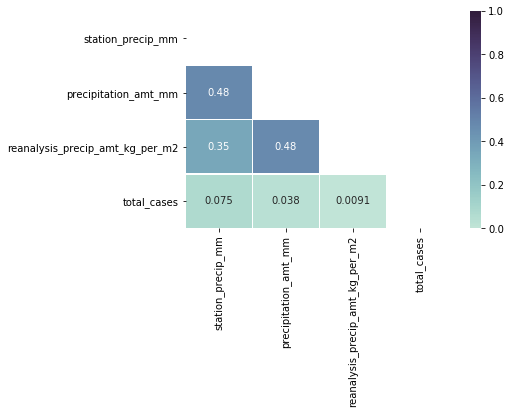

In [18]:
correlation_precip = train_df[['station_precip_mm', 
                               'precipitation_amt_mm', 
                               'reanalysis_precip_amt_kg_per_m2', 
                               'total_cases']].corr(method='pearson')

mask = np.zeros_like(correlation_precip)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs(correlation_precip), 
            linewidths=.5,
            mask=mask,
            cmap=cmap,
            vmin=0,
            vmax=1,
            annot=True)

Observamos que la variable objetivo `total_cases` apenas se correlaciona con estas 3 variables de precipitaciones. Procedemos a eliminarlas.

In [19]:
train_df.drop(['station_precip_mm', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2'], axis=1, inplace=True)
test_df.drop(['station_precip_mm', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2'], axis=1, inplace=True)

# Temperaturas
La temperatura la tenemos medida tanto en Kelvin como en grados Celsius. Ambas expresan lo mismo: *Kelvin = Celsius + 273.15*  
Además está medida por satélite y desde una estación ambiental. Veremos si estos datos difieren mucho unos de otros.

In [20]:
train_df[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 
          'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
          'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 
          'station_avg_temp_c', 'station_diur_temp_rng_c',                        'station_max_temp_c', 'station_min_temp_c']].head(5)

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
0,297.572857,297.742857,292.414286,299.8,295.9,2.628571,25.442857,6.900000,29.4,20.0
1,298.211429,298.442857,293.951429,300.9,296.4,2.371429,26.714286,6.371429,31.7,22.2
2,298.781429,298.878571,295.434286,300.5,297.3,2.300000,26.714286,6.485714,32.2,22.8
3,298.987143,299.228571,295.310000,301.4,297.0,2.428571,27.471429,6.771429,33.3,23.3
4,299.518571,299.664286,295.821429,301.9,297.5,3.014286,28.942857,9.371429,35.0,23.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016614DFA848>,
      dtype=object)

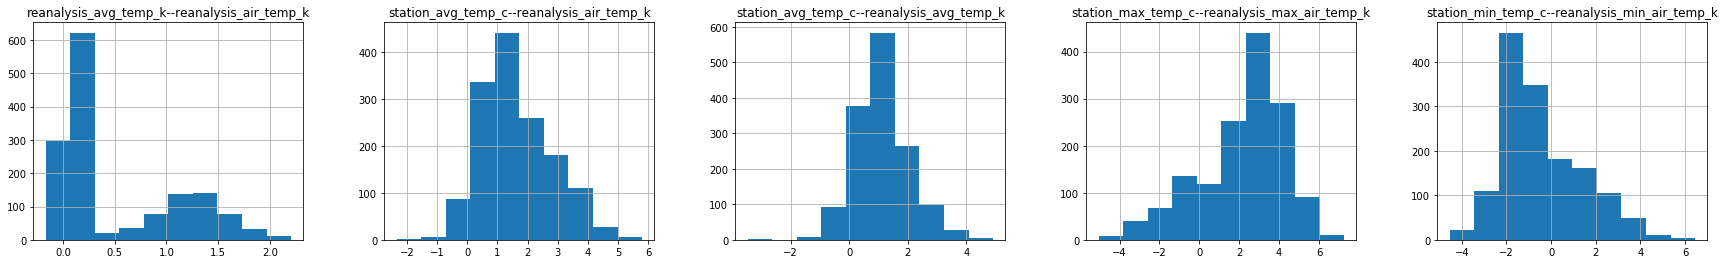

In [21]:
# Transformamos los grados Celsius a Kelvin y restamos con las columnas de las temperaturas en Kelvin. Comprobamos si estas temperaturas difieren mucho o no.
df = pd.DataFrame()
df['station_avg_temp_c--reanalysis_air_temp_k'] = train_df['station_avg_temp_c']+273.15 - train_df['reanalysis_air_temp_k']
df['reanalysis_avg_temp_k--reanalysis_air_temp_k'] = train_df['reanalysis_avg_temp_k'] - train_df['reanalysis_air_temp_k']
df['station_avg_temp_c--reanalysis_avg_temp_k'] = train_df['station_avg_temp_c']+273.15 - train_df['reanalysis_avg_temp_k']

df['station_max_temp_c--reanalysis_max_air_temp_k'] = train_df['station_max_temp_c']+273.15 - train_df['reanalysis_max_air_temp_k']
df['station_min_temp_c--reanalysis_min_air_temp_k'] = train_df['station_min_temp_c']+273.15 - train_df['reanalysis_min_air_temp_k']

df.hist(figsize=(30,4), layout=(1,5))

Vemos que las temperatuas difieren en 4-6 unidades. En el caso de los datos de *reanalysis_*, hemos visto que los datos se recogen por satélite haciendo un grid espacial y calculando la temperatura media de cada zona. Consideramos este dato más real, que el obtenido desde una estación medioambiental que recoge datos en un lugar puntual y puede estar influido por fluctuaciones climatológicas locales.

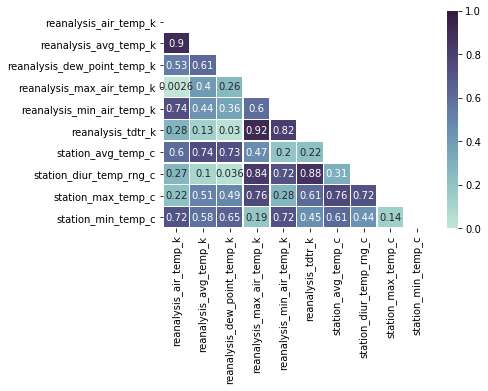

In [22]:
correlation_temp = train_df[['reanalysis_air_temp_k',
                             'reanalysis_avg_temp_k',
                             'reanalysis_dew_point_temp_k',
                             'reanalysis_max_air_temp_k',
                             'reanalysis_min_air_temp_k',
                             'reanalysis_tdtr_k',
                             'station_avg_temp_c',
                             'station_diur_temp_rng_c',
                             'station_max_temp_c',
                             'station_min_temp_c'
                            ]].corr()

mask = np.zeros_like(correlation_temp)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs(correlation_temp), 
            linewidths=.5,
            mask=mask,
            cmap=cmap,
            vmin=0,
            vmax=1,
            annot=True)

In [23]:
# Eliminamos las temperaturas medidas por la estación
train_df.drop(columns=['station_avg_temp_c', 'station_max_temp_c',
                       'station_min_temp_c', 'station_diur_temp_rng_c',
                       'reanalysis_avg_temp_k', 'reanalysis_tdtr_k'], 
              inplace=True)

test_df.drop(columns=['station_avg_temp_c', 'station_max_temp_c',
                       'station_min_temp_c', 'station_diur_temp_rng_c',
                       'reanalysis_avg_temp_k', 'reanalysis_tdtr_k'], 
              inplace=True)

## Humedad

Respecto a las columnas de las humedades: `reanalysis_relative_humidity_percent`,  `reanalysis_specific_humidity_g_per_kg`  

Nos quedaremos con la humedad relativa porque entre las dos variables de humedad es la que menos correlación tiene con `reanalysis_dew_point_temp_k`.

In [24]:
# Eliminamos la humedad específica.
train_df.drop('reanalysis_specific_humidity_g_per_kg', axis=1, inplace=True)
test_df.drop('reanalysis_specific_humidity_g_per_kg', axis=1, inplace=True)

## Vegetación

Vemos en la matriz de correlación que los valores de vegetación del norte están muy correlacionados entre sí, y los del sur entre sí (este con oeste). Planteamos dividir estas 4 secciones en 2: norte y sur.

In [25]:
train_df['ndvi_n'] = train_df[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
train_df['ndvi_s'] = train_df[['ndvi_se', 'ndvi_sw']].mean(axis=1)

test_df['ndvi_n'] = test_df[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
test_df['ndvi_s'] = test_df[['ndvi_se', 'ndvi_sw']].mean(axis=1)

# Quitamos las columnas innecesarias
train_df.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)
test_df.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

Tras el análisis de cada una de las variables de los datasets, el dataset resultante queda de la siguiente manera.  
Comprobamos la correlación final de todo el dataset.

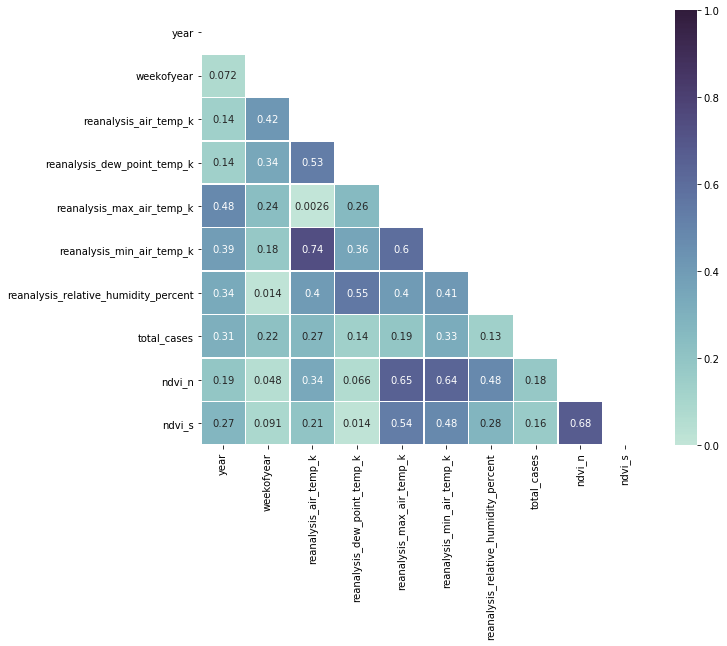

In [26]:
correlation = train_df.corr(method='pearson')

# Definimos máscara para enseñar la matriz triangular inferior
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

# Definimos paleta de colores
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

plt.figure(figsize=(10,8))
sns.heatmap(abs(correlation), 
            linewidths=.5,
            mask=mask,
            cmap=cmap,
            vmin=0,
            vmax=1,
            annot=True)

Nos percatamos de que todavía tenemos una variable altamente correlacionada. Terminamos con la eliminación de la variable `reanalysis_min_air_temp_k`.

In [27]:
train_df.drop(columns=['reanalysis_min_air_temp_k'],
              inplace=True)
test_df.drop(columns=['reanalysis_min_air_temp_k'],
              inplace=True)              

Por último, eliminamos las dos columnas `city`, `year` y `weekofyear`, no nos interesan, mientras que mantengamos el orden de nuestros datos.

In [28]:
train_df.drop(columns=['city', 'year', 'weekofyear'],
              inplace=True)

test_df.drop(columns=['city', 'year', 'weekofyear'],
             inplace=True)

In [29]:
# Comprobamos que Train y Test tengan las mismas columnas
print('Dataset Train y Test, mismas columnas: ', train_df.columns.all() == test_df.columns.all())

Dataset Train y Test, mismas columnas:  True




---
## Reducción de dimensionalidad y detección de outliers.

Con el fin de representar nuestros datos y construir un modelo más sencillo, vamos a realizar una reducción de dimensionalidad mediante PCA.  

Después de esto, aplicaremos la técnica de clustering DBSCAN para detectar outliers en nuestros datos.

Procedemos a detectar outliers en nuestro dataset. La primera comprobación lo haremos mediante clustering jerárquico con un dendograma. Recordar que tenemos 10 dimensiones en nuestro dataset, podríamos tener el problema de la dimensionalidad.


In [30]:
# Z = linkage(train_df, method='single', metric='euclidean')

# # calculate full dendrogram
# plt.figure(figsize=(40, 10))
# plt.title('Dendrograma Train')
# plt.xlabel('índice de la muestra')
# plt.ylabel('distancia')
# dendrogram(
#     Z,
#     # truncate_mode='lastp',
#     # p=100,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
# )
# plt.show()

In [31]:
# # Enfocamos a las 200 últimas uniones
# plt.figure(figsize=(40, 10))
# plt.title('Dendrograma Train (últimas 200 uniones)')
# plt.xlabel('índice de la muestra')
# plt.ylabel('distancia')
# dendrogram(
#     Z,
#     truncate_mode='lastp',
#     p=200,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
# )
# plt.show()

In [32]:
# Z = linkage(test_df, method='single', metric='euclidean')

# # calculate full dendrogram
# plt.figure(figsize=(25, 10))
# plt.title('Dendrograma Test')
# plt.xlabel('índice de la muestra')
# plt.ylabel('distancia')
# dendrogram(
#     Z,
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
# )
# plt.show()

De los dendogramas podemos ver que:
- El dataset de train presenta un subconjunto de valores diferentes a los demás. Pero no nos encontramos con un valor suelto, sino con un pequeño subconjunto de ellos. Una explicación a este fenónemo puede ser una época de sequía, de lluvias torrenciales u olas de calor/frío. Son datos válidos pero que se alejan de lo usual. El mosquito tendrá que luchar contra ellos también, asi que los mantendremos en nuestro dataset.

- El dataset de test está claramente dividido en dos conjuntos. Estos dos conjuntos pueden ser las dos ciudades: San Juan e Iquitos.  
   Se ven un par de valores algo alejados de sus respectivos conjuntos, pero estamos en el dataset de test, aquí no podemos eliminar nada. No tendría sentido, tenemos que predecir en estas situaciones también.

## Visualización de los datos

Para visualizar los datos necesitamos reducir la dimensionalidad del dataset. Para ello, aplicaremos Principal Component Analysis (PCA), reduciendo a 3-4 variables.
Antes de aplicar PCA tendremos que estandarizar nuestras variables. Lo haremos mediante el transformador MinMaxScaler que ajusta nuestros datos al intervalo 0-1.

In [50]:
# Definimos dataset de Train, Test y separamos en variables dependientes e independiente.
X_train = train.drop('total_cases', axis=1)
X_test = test
y_train = train['total_cases']

# Definimos transformador
transformer = MinMaxScaler(feature_range=[0,1]).fit(X_train)

# Normalizamos los datos:
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

In [51]:
# Hacemos barrido en número de componentes para conocer qué valor explica más varianza.
for i in range(2, X_train.shape[1]+1):
    estimator = PCA(n_components=i)
    X_train_norm_pca = estimator.fit_transform(X_train_norm)
    print('Numero de componentes: ', estimator.n_components, "\tVariance Ratio: ", round(sum(estimator.explained_variance_ratio_)*100,2),'%')

Numero de componentes:  2 	Variance Ratio:  72.95 %
Numero de componentes:  3 	Variance Ratio:  90.21 %
Numero de componentes:  4 	Variance Ratio:  96.68 %
Numero de componentes:  5 	Variance Ratio:  99.96 %
Numero de componentes:  6 	Variance Ratio:  100.0 %


El número de componentes principales que usaremos será 4. Con este valor somos capaces de explicar casi el 97% de la varianza de nuestros datos, simplificando el problema enormemente.

In [52]:
# Definimos transformador PCA con 4 componentes
pca = PCA(n_components=4)

# Reducimos dimensionalidad
X_train_norm_pca = pca.fit_transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

In [142]:
# Creamos una variable auxiliar para hacer los plots siguientes
aux = pd.DataFrame(X_train_norm_pca, columns=[0,1,2,3])
aux['city'] = labels_df['city']

aux['color'] = None
aux['color'][aux['city']=='sj'] = 'blue'
aux['color'][aux['city']=='iq'] = 'red'

In [143]:
fig = make_subplots(rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# # Plot 3D
fig.add_trace(
    go.Scatter3d(x=aux[0],
                 y=aux[1],
                 z=aux[2],
                 mode='markers',
                 marker = dict(size = 3, color=aux['color']),
                 name='Ejes 0-1-2',
                 text='city: '+aux['city']),
             row=1, col=1)
fig.add_trace(
    go.Scatter3d(x=aux[0],
                 y=aux[1],
                 z=aux[3],
                 mode='markers',
                 marker = dict(size = 3, color=aux['color']),
                 name='Ejes 0-1-3',
                 text='city: '+aux['city']),
             row=1, col=2)
fig.add_trace(
    go.Scatter3d(x=aux[0],
                 y=aux[2],
                 z=aux[3],
                 mode='markers',
                 marker = dict(size = 3, color=aux['color']),
                 name='Ejes 0-2-3',
                 text='city: '+aux['city']),
             row=2, col=1)
fig.add_trace(
    go.Scatter3d(x=aux[1],
                 y=aux[2],
                 z=aux[3],
                 mode='markers',
                 marker = dict(size = 3, color=aux['color']),
                 name='Ejes 1-2-3',
                 text='city: '+aux['city']),
             row=2, col=2)

fig.update_layout(
    title_text='Subplots para cada subconjunto de 3 ejes',
    height=700,
    width=700
)

fig.show()

En los subplots anteriores se representan los datos para cada una de las combinaciones posibles (3 elementos sobre 4). Queríamos plotear de alguna manera 4 ejes, de esta manera enseñamos que efectivamente las dos ciudades se encuentran en regiones del espacio distintas.  

#### *Nota: Haciendo el ejercicio vi que las ciudades estaban separadas. Traté de rehacer la actividad estudiando las ciudades por separado. Vi que cada ciudad presentaba una matriz de correlación diferente. Apliqué un análisis como el que se ha hecho en esta actividad. Cree un modelo de regresión lineal para cada ciudad y los apliqué para predecir los casos totales. ¿El resultado? Un MAE más grande :( Así que finalmente me decanté por este procedimiento.*

Terminamos la actividad guardando los datos limpios en un archivo CSV. No guardaremos los datos normalizados, sino los datos sin normalizar. No haremos esto por si en la actividad 2 queremos hacer otro tipo de preprocesamiento antes de usar los modelos.

In [144]:
# Guardamos los datos limpios en un archivo CSV.
train_df.to_csv('dengue_train.csv',
                 sep=',',
                 index=False)

test_df.to_csv('dengue_test.csv',
                 sep=',',
                 index=False)